# CPSC 585 Project 1: Perceptrons
SPRING 2022
Group 1: 
# Cesar Martinez Melgoza, Cody Shook, Justin Drouin, Michael Nguyen

In this project, we will implement the binary perceptron algorithm to recognize rudimentary characters on bitmapped fonts

1. Use from dataset import * to load the module, then examine TRAINING_SET, TEST_SET, and MESSAGE. 

In [ ]:
from dataset import *

2. Implement a Python function show(image) to print() a letter image row-by-row using a hash mark ('#') for 1 and a space (' ') for 0. Test this function on some of the images in TRAINING_SET.

In [ ]:
def show(image):
    for index in range(len(image)):
        if index % 16 == 0:
          print()
          # replaces 1 with # and 0 with empty space
        if image[index] == 1:
          print('#', end='')
        if image[index] == 0:
          print(' ', end='')        

# Outputs all letters from the training set
for x in range(0,len(TRAINING_SET)):
    show(TRAINING_SET[x][1])



    ####        
    ####        
  ########      
  ########      
####    ####    
####    ####    
####    ####    
####    ####    
############    
############    
####    ####    
####    ####    
####    ####    
####    ####    
                
                
############    
############    
  ####    ####  
  ####    ####  
  ####    ####  
  ####    ####  
  ##########    
  ##########    
  ####    ####  
  ####    ####  
  ####    ####  
  ####    ####  
############    
############    
                
                
    ########    
    ########    
  ####    ####  
  ####    ####  
####            
####            
####            
####            
####            
####            
  ####    ####  
  ####    ####  
    ########    
    ########    
                
                
##########      
##########      
  ####  ####    
  ####  ####    
  ####    ####  
  ####    ####  
  ####    ####  
  ####    ####  
  ####    ####  
  ####    ####  
  ####  #### 

3. Implement a perceptron to recognize the letter A by producing output +1 for images of the letter A and -1 for images of all other letters.
Begin with weights initialized to random values and a learning rate of 𝛼 = 0.01. Use Equation 1.1 in the textbook to predict whether the image is an A.
If the prediction is incorrect, train the perceptron by applying the update rule of Equation 1.4 in the textbook. Continue training on the items in TRAINING_SET until all items are correctly classified.
Hint: You may also want to examine the pseudocode on p. 35 of Artificial Intelligence Engines.
4. Use your trained perceptron to classify each image in TEST_SET. Does the perceptron correctly distinguish the letter A from the other letters?
5. Repeat experiment (3) for the rest of the letters, for a total of 26 trained perceptrons. If any perceptron fails to converge, implement the “pocket algorithm” as described at the end of Section 1.2.1.1 of the textbook on p. 8.

In [ ]:
import random as rand
# Define and instantiate the perceptron class
class Perceptron:
    def __init__(self, data, learning_rate=0.01, bias=1.0, epochs=1):
        self.weights = []
        self.init_weights()
        self.lr = learning_rate
        self.data = data
        self.bias = bias
        self.epochs = epochs
        self.loss = []
        self.acc = []
    
    # Initialize weights to random values when perceptron is created
    def init_weights(self):
        for x in range(0,26): 
            w = []
            for y in range(0,256):
                w.append(rand.uniform(0,1))
            self.weights.append(w)
    
    # Uses Equation 1.1 in the textbook to predict whether the image is an A.
    # Sign Activiation Function
    def sign(self,n):
        return 1.0 if n >= 0.0 else -1.0

    # If the prediction is incorrect, train the perceptron by applying the update rule of Equation 1.4 in the textbook.
    # Continue training on the items in TRAINING_SET until all items are correctly classified.
    # Add loop that tests each    
    def train(self, data):
        iters = 0

        for it in range(0, self.epochs):
            # Loop through each character
            for i in range(0,len(data)):
                correct = 0
                train_char = data[i][0]
                y_t = 0
                # Loop through and compare each character with following character
                for j in range(0, len(data)):
                    print("===== LETTER " + data[j][0] + " ======")
                    # Target is +1 if the input matches the target char in the dataset
                    if train_char == data[j][0]:
                        y_t = 1.0
                    # Target is -1 for misclassified input
                    else:
                        y_t = -1.0
                    
                    # Training each letter
                    learning = True
                    while learning:
                        learning = False

                        # Initialize weight vector, w0
                        sum = self.bias
                        # Get pre-activation value
                        for k in range(0, 256):
                            sum += self.weights[j%26][k] * data[j][1][k]
                        # Get post-activation value
                        y_pred = self.sign(sum)
                       
                        print("Target : ", y_t)
                        print("Result : ", y_pred)
                        print('')


                         # Check for misclassified inputs and update weights
                         # Count correct predictions, a.k.a (y_t - y_pred) == 0
                        if y_t == -1.0 and y_pred == 1.0:
                            for x in range(0,256):
                                self.weights[j%26][x] += self.lr * (y_t - y_pred) * data[j][1][x]
                                learning = True
                        elif y_t == 1.0 and y_pred == -1.0:
                            for x in range(0,256):
                                self.weights[j%26][x] += self.lr * (y_t - y_pred) * data[j][1][x]
                                learning = True
                        else:
                            correct += 1
                        
                        # Number of epochs/iterations it takes to converge and update weights
                        iters += 1
                        #print('Iterations: ', iters)
                        self.loss.append(iters)

                        accuracy = correct / len(data) * 100
                        self.acc.append(accuracy)
                        print('Accuracy: ', accuracy)
                # If accuracy reaches 100% then stop tranining loop
                if accuracy == 100:
                    print('')
                    print('STOPPED @ EPOCH #', iters)
                    break

    def test(self, data, target, weights):
        correct = 0
        accuracy = 0.0
        y_t = 0
        for i in range(0,26):
            test_char = data[i][0]
            # Target is +1 if the input matches the target char, A in the dataset
            if test_char == target:
                y_t = 1.0
            # Target is -1 for misclassified inputs
            if test_char != data[i][0]:
                y_t = -1.0   
            # Initialize weight vector, w0     
            sum = self.bias
            # Get pre-activation value
            for x in range(0,256):
                sum += weights[i][x] * data[i][1][x]
            # Get post-activation value
            y_pred = self.sign(sum)
            # Count correct predictions
            if (y_t - y_pred) == 0: correct += 1
            # Record and return accuracy
        accuracy = correct / len(data) * 100
        return f'Test Set Accuracy For {target}: {round(accuracy, 4)}%\n'
                
p = Perceptron(TRAINING_SET)
p.train(TRAINING_SET)
print('Training Finished')


===== LETTER A ======
Target :  1.0
Result :  1.0

Accuracy:  1.9230769230769231
===== LETTER B ======
Target :  -1.0
Result :  1.0

Accuracy:  1.9230769230769231
Target :  -1.0
Result :  1.0

Accuracy:  1.9230769230769231
Target :  -1.0
Result :  1.0

Accuracy:  1.9230769230769231
Target :  -1.0
Result :  1.0

Accuracy:  1.9230769230769231
Target :  -1.0
Result :  1.0

Accuracy:  1.9230769230769231
Target :  -1.0
Result :  1.0

Accuracy:  1.9230769230769231
Target :  -1.0
Result :  1.0

Accuracy:  1.9230769230769231
Target :  -1.0
Result :  1.0

Accuracy:  1.9230769230769231
Target :  -1.0
Result :  1.0

Accuracy:  1.9230769230769231
Target :  -1.0
Result :  1.0

Accuracy:  1.9230769230769231
Target :  -1.0
Result :  1.0

Accuracy:  1.9230769230769231
Target :  -1.0
Result :  1.0

Accuracy:  1.9230769230769231
Target :  -1.0
Result :  1.0

Accuracy:  1.9230769230769231
Target :  -1.0
Result :  1.0

Accuracy:  1.9230769230769231
Target :  -1.0
Result :  1.0

Accuracy:  1.92307692307692

 - (Output above shows perceptron training until it converges to correct prediction where we eventually achieve 100% accuracy)

6. Repeat experiment (4) for each trained perceptron on each letter. What accuracy does your set of perceptrons achieve on the TEST_SET?

If the accuracy is less than 100%, which test images are misclassified, and how do they compare to the training images?

In [ ]:
# Test set is ran
# Unlike the training set, the test set fails to converge
# Z receives the lowest accuracy
for x in range(0, len(TEST_SET)):
    print(p.test(TEST_SET, TEST_SET[x][0], p.weights))

Test Set Accuracy For A: 46.1538%

Test Set Accuracy For B: 42.3077%

Test Set Accuracy For C: 42.3077%

Test Set Accuracy For D: 42.3077%

Test Set Accuracy For E: 42.3077%

Test Set Accuracy For F: 42.3077%

Test Set Accuracy For G: 42.3077%

Test Set Accuracy For H: 42.3077%

Test Set Accuracy For I: 38.4615%

Test Set Accuracy For J: 38.4615%

Test Set Accuracy For K: 38.4615%

Test Set Accuracy For L: 38.4615%

Test Set Accuracy For M: 38.4615%

Test Set Accuracy For N: 34.6154%

Test Set Accuracy For O: 30.7692%

Test Set Accuracy For P: 30.7692%

Test Set Accuracy For Q: 30.7692%

Test Set Accuracy For R: 26.9231%

Test Set Accuracy For S: 26.9231%

Test Set Accuracy For T: 23.0769%

Test Set Accuracy For U: 19.2308%

Test Set Accuracy For V: 15.3846%

Test Set Accuracy For W: 11.5385%

Test Set Accuracy For X: 7.6923%

Test Set Accuracy For Y: 3.8462%

Test Set Accuracy For Z: 0.0%



#Part 2 - NumPy and Matplotlib

7. Convert the images in TRAINING_SET, TEST_SET, and MESSAGE into two-dimensional NumPy arrays of size (# examples × # features).

8. Repeat experiment (5) using NumPy operations. You will still need loops for iterating over the perceptrons to be trained and running each training epoch, but mathematical operations such Equations 1.1 and 1.4 in the textbook should be implemented using NumPy array operations and methods such as np.dot().
Maintain the weights for each perceptron as a single row in a matrix W of size. (# perceptrons × # weights)
9. Repeat experiment (6), implementing the prediction step using a single call to np.matmul() to multiply the matrix of weights W by the TEST_SET matrix you created in experiment (7).

In [ ]:
import numpy as np
import random as rand

# Convert the datasets into 2D Numpy arrays
train_set = np.array(TRAINING_SET, dtype=object)
test_set = np.array(TEST_SET, dtype=object)
msg_set = np.array(MESSAGE, dtype=object)

class Perceptron:
    def __init__(self, data, learning_rate=0.01, bias=1.0, epochs=1):
        self.weights = []
        self.lr = learning_rate
        self.data = data
        self.bias = bias
        self.epochs = epochs
        self.init_weights()
        self.loss = []
        self.acc = []
    
    # Initialize weights to random values when perceptron is created
    def init_weights(self):
        for x in range(0,26): 
            w = []
            for y in range(0,256):
                w.append(rand.uniform(0,1))
            self.weights.append(w)
    
    # Sign Activiation Function
    def sign(self,n):
        return 1 if n >= 0 else -1

    # If the prediction is incorrect, train the perceptron by applying the update rule of Equation 1.4 in the textbook.
    # Continue training on the items in TRAINING_SET until all items are correctly classified.       
    def train(self, data):
        iters = 0

        for it in range(0, self.epochs):
            # Loop through each character
            for i in range(0,len(data)):
                correct = 0
                train_char = data[i][0]
                y_t = 0
                # Loop through and compare each character with following character
                for j in range(0, len(data)):
                    print("===== LETTER " + data[j][0] + " ======")
                    # Target is +1 if the input matches the target char in the dataset
                    if train_char == data[j][0]:
                        y_t = 1.0
                    # Target is -1 for misclassified input
                    else:
                        y_t = -1.0
                    
                    # Training each letter
                    learning = True
                    while learning:
                        learning = False

                        # Initialize weight vector, w0
                        # Get pre-activation value
                        sum = np.dot(data[j][1], self.weights[j%26]) + self.bias
                         # Get post-activation value
                        y_pred = self.sign(sum)
                       
                        print("Target : ", y_t)
                        print("Result : ", y_pred)
                        print('')

                        # Initiaite self update rule
                        update_rule = self.lr * (y_t - y_pred)

                        # Check for misclassified inputs and update weights
                        if y_t == -1.0 and y_pred == 1.0:
                            for k in range(0,256):
                                self.weights[j%26][k] = np.add(self.weights[j%26][k], update_rule * data[j][1][k])
                            learning = True
                        elif y_t == 1.0 and y_pred == -1.0:
                            for k in range(0,256):
                                self.weights[j%26][k] = np.add(self.weights[j%26][k], update_rule * data[j][1][k])
                            learning = True
                        else:
                            correct += 1
                        
                        # Update the number of epochs it takes to train a letter
                        iters += 1
                        #print('Iterations: ', iters)
                        
                        # Update loss and accuracy value lists for the plot
                        self.loss.append(iters)
                        # Count correct predictions
                        accuracy = correct / len(data) * 100
                        self.acc.append(accuracy)
                        print('Accuracy: ', accuracy)
                # If accuracy reaches 100% then stop tranining loop
                if accuracy == 100:
                    print('')
                    print('STOPPED @ EPOCH #', iters)
                    break

    def test(self, data, target, weights):
        correct = 0
        accuracy = 0.0
        y_t = 0
        for i in range(0,26):
            test_char = data[i][0]
            # Target is +1 if the input matches the target char, A in the dataset
            if test_char == target:
                y_t = 1.0
            # Target is -1 for misclassified inputs
            if test_char != data[i][0]:
                y_t = -1.0   

            #Initialize weight vector, w0    
            sum = self.bias
            # Get pre-activation value
            sum += np.matmul(weights[i][:], data[i][1][:])
            # Get post-activation value
            y_pred = self.sign(sum)
            # Count correct predictions
            if (y_t - y_pred) == 0: 
                correct += 1
        # Record and return accuracy
        accuracy = correct / len(data) * 100
        return f'Test Set Accuracy For {target}: {round(accuracy, 4)}%\n'
    
    def predict_msg(self, data, weights):
        # Created msg variable contain message string
        msg = 'THEFIVEBOXINGWIZARDSJUMPQUICKLY'
        
        correct = 0
        accuracy = 0.0
        test_char_idx = 0

        # Loop through each character in message
        for x in range(0, len(data)):
            print("--------------------------TESTING Letter: ", msg[x], "-------------------------------")
            # Target is +1 if the input matches the target char
            # If character exists, store index in test_char_idx to access specific weight's index for
            # the corresponding character
            for i in range(0, len(test_set)):
                if msg[x] == test_set[i][0]:
                    y_t = 1
                    test_char_idx = i
                # Initialize weight vector, w0 
                # Get pre-activation value
                # Dot product of the weights corresponding to each letters image array
                sum = np.dot(data[x], weights[test_char_idx]) + self.bias
                # Get post-activation value
                y_pred = self.sign(sum)

            # Check whether prediction value equals target value    
            if (y_t - y_pred) == 0:
                correct += 1
            
            print("Target: ", y_t)
            print("Result: ", y_pred)
        # Record and return message accuracy
        accuracy = correct / len(msg_set) * 100
        print("MESSAGE Accuracy: ", round(accuracy, 4), "%")  
           
p2 = Perceptron(TRAINING_SET)
p2.train(TRAINING_SET)
print('Training Finished')


===== LETTER A ======
Target :  1.0
Result :  1

Accuracy:  1.9230769230769231
===== LETTER B ======
Target :  -1.0
Result :  1

Accuracy:  1.9230769230769231
Target :  -1.0
Result :  1

Accuracy:  1.9230769230769231
Target :  -1.0
Result :  1

Accuracy:  1.9230769230769231
Target :  -1.0
Result :  1

Accuracy:  1.9230769230769231
Target :  -1.0
Result :  1

Accuracy:  1.9230769230769231
Target :  -1.0
Result :  1

Accuracy:  1.9230769230769231
Target :  -1.0
Result :  1

Accuracy:  1.9230769230769231
Target :  -1.0
Result :  1

Accuracy:  1.9230769230769231
Target :  -1.0
Result :  1

Accuracy:  1.9230769230769231
Target :  -1.0
Result :  1

Accuracy:  1.9230769230769231
Target :  -1.0
Result :  1

Accuracy:  1.9230769230769231
Target :  -1.0
Result :  1

Accuracy:  1.9230769230769231
Target :  -1.0
Result :  1

Accuracy:  1.9230769230769231
Target :  -1.0
Result :  1

Accuracy:  1.9230769230769231
Target :  -1.0
Result :  1

Accuracy:  1.9230769230769231
Target :  -1.0
Result :  1

A

10. Verify that this version computes the same weights and achieves the same accuracy as the experiments in Part 1.

In [ ]:
print('Original Perceptron Test Set')
# The original test set produces the same accuracy values as before
for x in range(0, len(TEST_SET)):
    print(p.test(TEST_SET, TEST_SET[x][0], p.weights))

Original Perceptron Test Set
Test Set Accuracy For A: 46.1538%

Test Set Accuracy For B: 42.3077%

Test Set Accuracy For C: 42.3077%

Test Set Accuracy For D: 42.3077%

Test Set Accuracy For E: 42.3077%

Test Set Accuracy For F: 42.3077%

Test Set Accuracy For G: 42.3077%

Test Set Accuracy For H: 42.3077%

Test Set Accuracy For I: 38.4615%

Test Set Accuracy For J: 38.4615%

Test Set Accuracy For K: 38.4615%

Test Set Accuracy For L: 38.4615%

Test Set Accuracy For M: 38.4615%

Test Set Accuracy For N: 34.6154%

Test Set Accuracy For O: 30.7692%

Test Set Accuracy For P: 30.7692%

Test Set Accuracy For Q: 30.7692%

Test Set Accuracy For R: 26.9231%

Test Set Accuracy For S: 26.9231%

Test Set Accuracy For T: 23.0769%

Test Set Accuracy For U: 19.2308%

Test Set Accuracy For V: 15.3846%

Test Set Accuracy For W: 11.5385%

Test Set Accuracy For X: 7.6923%

Test Set Accuracy For Y: 3.8462%

Test Set Accuracy For Z: 0.0%



In [ ]:
# Numpy test set using the same weights
# Accuracy values are roughly similar
# More letters are 50% or more in the original test set
for x in range(0, len(test_set)):
    print(p2.test(test_set, test_set[x][0], p2.weights))

Test Set Accuracy For A: 46.1538%

Test Set Accuracy For B: 42.3077%

Test Set Accuracy For C: 42.3077%

Test Set Accuracy For D: 42.3077%

Test Set Accuracy For E: 42.3077%

Test Set Accuracy For F: 42.3077%

Test Set Accuracy For G: 42.3077%

Test Set Accuracy For H: 42.3077%

Test Set Accuracy For I: 38.4615%

Test Set Accuracy For J: 38.4615%

Test Set Accuracy For K: 38.4615%

Test Set Accuracy For L: 34.6154%

Test Set Accuracy For M: 34.6154%

Test Set Accuracy For N: 30.7692%

Test Set Accuracy For O: 30.7692%

Test Set Accuracy For P: 30.7692%

Test Set Accuracy For Q: 30.7692%

Test Set Accuracy For R: 26.9231%

Test Set Accuracy For S: 26.9231%

Test Set Accuracy For T: 23.0769%

Test Set Accuracy For U: 19.2308%

Test Set Accuracy For V: 15.3846%

Test Set Accuracy For W: 11.5385%

Test Set Accuracy For X: 7.6923%

Test Set Accuracy For Y: 3.8462%

Test Set Accuracy For Z: 0.0%



11. Predict the letters for MESSAGE. How well do the perceptrons perform? Does any image cause more than one perceptron to return +1? Does any image fail to return +1 for at least one perceptron?

In [ ]:
p2.predict_msg(msg_set, p2.weights)

--------------------------TESTING Letter:  T -------------------------------
Target:  1
Result:  1
--------------------------TESTING Letter:  H -------------------------------
Target:  1
Result:  1
--------------------------TESTING Letter:  E -------------------------------
Target:  1
Result:  1
--------------------------TESTING Letter:  F -------------------------------
Target:  1
Result:  1
--------------------------TESTING Letter:  I -------------------------------
Target:  1
Result:  1
--------------------------TESTING Letter:  V -------------------------------
Target:  1
Result:  -1
--------------------------TESTING Letter:  E -------------------------------
Target:  1
Result:  -1
--------------------------TESTING Letter:  B -------------------------------
Target:  1
Result:  -1
--------------------------TESTING Letter:  O -------------------------------
Target:  1
Result:  1
--------------------------TESTING Letter:  X -------------------------------
Target:  1
Result:  1
-------

 - Perceptron does not perform well with MESSAGE. Our MESSAGE accuracy ranges from 30-50% with our perceptron making about under half of its predictions correct. We also expected the perceptron accuracy to be lower than the test set accuracy. 
 - We used show() fn to display the MESSAGE and store the MESSAGE as a string variable, which we would use to locate the target letter's respective weights list (as shown in the p2.predict_msg() implementation above)

# Predicting message with image data

In [ ]:

#msg_set, train_set, test_set
print(len(msg_set))

def numpyConv(row, col, data):
  temp = np.empty([row, col], dtype=object)
  for i in range(0, row):
    if col == 1:
      temp[i][0] = data[i][0]
    else: 
      for j in range(0, col):
        temp[i][j] = data[i][1][j]
  return temp

p2_char = numpyConv(26, 1, TEST_SET)

def getchar2(data, bias):
  for i in range(0, 26):
    pred = np.dot(data, p2.weights[i])
    val = p2.sign(pred)
    if val == -1:
      return p2_char[i]

for i in range(0, len(msg_set)):
  print(getchar2(msg_set[i], 0))

31
None
['M']
['E']
['E']
['I']
['H']
['E']
['B']
['O']
None
['I']
['M']
['G']
['W']
['I']
['Z']
['O']
['R']
['B']
['S']
['J']
['H']
['M']
['B']
['Q']
['N']
['I']
['G']
['K']
['B']
['M']


In [ ]:
# Goes through each weight index 
# With respect to the current letter in the message
def getchar(data):
  for i in range(0, len(data)):
    print('===== MSG Character Index # ', i , '=====')
    for j in range(0, len(p2.weights)):
      print('Weight index # ', j)
      pred = np.dot(data[i], p2.weights[j][:])
      val = p2.sign(pred)
      print('Result: ', val)
    #if val == 1:
        #print(char_set[i][0])
      
getchar(msg_set)

===== MSG Character Index #  0 =====
Weight index #  0
Result:  1
Weight index #  1
Result:  1
Weight index #  2
Result:  1
Weight index #  3
Result:  1
Weight index #  4
Result:  1
Weight index #  5
Result:  1
Weight index #  6
Result:  1
Weight index #  7
Result:  1
Weight index #  8
Result:  1
Weight index #  9
Result:  1
Weight index #  10
Result:  1
Weight index #  11
Result:  1
Weight index #  12
Result:  1
Weight index #  13
Result:  1
Weight index #  14
Result:  1
Weight index #  15
Result:  1
Weight index #  16
Result:  1
Weight index #  17
Result:  1
Weight index #  18
Result:  1
Weight index #  19
Result:  1
Weight index #  20
Result:  1
Weight index #  21
Result:  1
Weight index #  22
Result:  1
Weight index #  23
Result:  1
Weight index #  24
Result:  1
Weight index #  25
Result:  1
===== MSG Character Index #  1 =====
Weight index #  0
Result:  1
Weight index #  1
Result:  1
Weight index #  2
Result:  1
Weight index #  3
Result:  1
Weight index #  4
Result:  1
Weight inde

* (Output shows us indexing through each image in MESSAGE, and getting a prediction value for each letter's respective weights)
* During our experiment, we had difficulty predicting the MESSAGE with just the image data because our perceptron could not classify the prediction correctly.

12. Now examine the images in MESSAGE. What does it say in English? (Note that there are no spaces between words.) Why do you suppose this was chosen as the message?

In [ ]:
for i in range(0, len(msg_set)):
    show(msg_set[i])


  ##############
  ############# 
  ##    ##    ##
  ##    ##    ##
        ##      
        ##      
        ##      
        ##      
        ##      
   #    ##    # 
        ##      
        ##      
      ######    
      ######    
  #             
                
  ##  #     ##  
  ##        ##  
  ##        ##  
  ##        ##  
  ##        ##  
  ##        ##  
  ############  
  ############  
  ##        ##  
  ##        ##  
# ##        ##  
  ##        ##  
  ##        ##  
  #          #  
                
                
##############  
  #  #    ####  
  ####      ##  
  ####  ##      
  ########      
  ####  ##      
  ####          
  ####      ##  
  #### #  ####  
##############  
                
                
                
                
         #      
                
##############  
  ####    ####  
   ###      ##  
  ####  ##      
  ########      
  ####  ##      
  ####          
  ####          
  ####          
### ####        
             

# "THE FIVE BOXING WIZARDS JUMP QUICKLY"

- This message is a panagram which is a sentence that contains each letter at least once. (31 letters total)
We use panagrams to display different font styles.

13. Modify your training loop to record the accuracy achieved in each epoch. (See Part2 Numpy implementation) Then plot a learning curve showing the error rate as a function of the number of epochs.

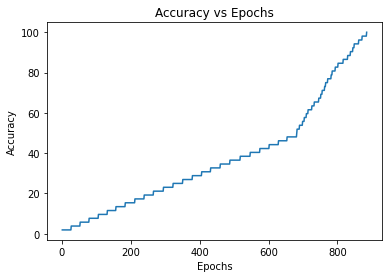

In [ ]:
from matplotlib import pyplot as plt

plt.plot(p2.loss, p2.acc)
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

For our experiment, we can see the accuracy starts increasing as the perceptron trains until it converges to the correct predictions at around ~900 epochs.